# Import Libraries and Load Data

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Read Raw Dataset
df = pd.read_csv("./Datasets/anime.csv")

# Data Overview

In [5]:
# Display the first few rows of the dataset
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [6]:
# Get basic statistics
df.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


In [7]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

# Data Cleaning

## Convert columns with numeric data stored as strings to numeric types

In [8]:
# Convert columns with numeric data stored as strings to numeric types
numeric_columns = ['Score', 'Episodes', 'Ranked', 'Popularity', 'Members', 'Favorites', 'Watching',
                   'Completed', 'On-Hold', 'Dropped', 'Plan to Watch',
                   'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6', 'Score-5',
                   'Score-4', 'Score-3', 'Score-2', 'Score-1']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

## Handling Missing Data
Based on the percentage of 'Unknown' values for each column, you may choose to fill them with a placeholder, drop them, or replace them with mean/median/mode.

In [9]:
# Replacing 'Unknown' with NaN for the 'English name' column
df.replace('Unknown', np.nan, inplace=True)

In [10]:
# Fill missing values with the median for all col

# Select columns of dtype not 'object'
non_object_columns = df.select_dtypes(exclude=['object'])

for col in non_object_columns:
    df[col].fillna(df[col].median(), inplace=True)

## Drop unnecessary columns

In [11]:
# Drop unnecessary columns
df.drop(['English name', 'Japanese name'], axis=1, inplace=True)

In [12]:
# each column with null values
null_percentages = df.isnull().mean() * 100

null_percentages[null_percentages > 10]

Premiered    72.981437
Producers    44.379911
Licensors    77.531033
Studios      40.308621
Source       20.310899
dtype: float64

In [13]:
# droping all columns which has a lot of null values, say more than 40%
df.drop(null_percentages[null_percentages > 40].index, axis=1, inplace=True)

In [14]:
# getting all the columns which have the null values in it
null_mask = df.isnull().any()

# Impute Null Values with most frequesnt values
for column in null_mask[null_mask==True].index:
    most_frequent_value = df[column].value_counts().idxmax()
    df[column] = df[column].fillna(most_frequent_value)

In [15]:
df.isnull().sum()

MAL_ID           0
Name             0
Score            0
Genres           0
Type             0
Episodes         0
Aired            0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         17562 non-null  int64  
 1   Name           17562 non-null  object 
 2   Score          17562 non-null  float64
 3   Genres         17562 non-null  object 
 4   Type           17562 non-null  object 
 5   Episodes       17562 non-null  float64
 6   Aired          17562 non-null  object 
 7   Source         17562 non-null  object 
 8   Duration       17562 non-null  object 
 9   Rating         17562 non-null  object 
 10  Ranked         17562 non-null  float64
 11  Popularity     17562 non-null  int64  
 12  Members        17562 non-null  int64  
 13  Favorites      17562 non-null  int64  
 14  Watching       17562 non-null  int64  
 15  Completed      17562 non-null  int64  
 16  On-Hold        17562 non-null  int64  
 17  Dropped        17562 non-null  int64  
 18  Plan t

# Data Visualization & Categorical Data Exploration

## Distribution of Anime Scores by Type
Ploting the distribution of scores for different types of anime (e.g., TV, Movie, OVA, etc.) to see if there are variations in the ratings based on the type of anime.

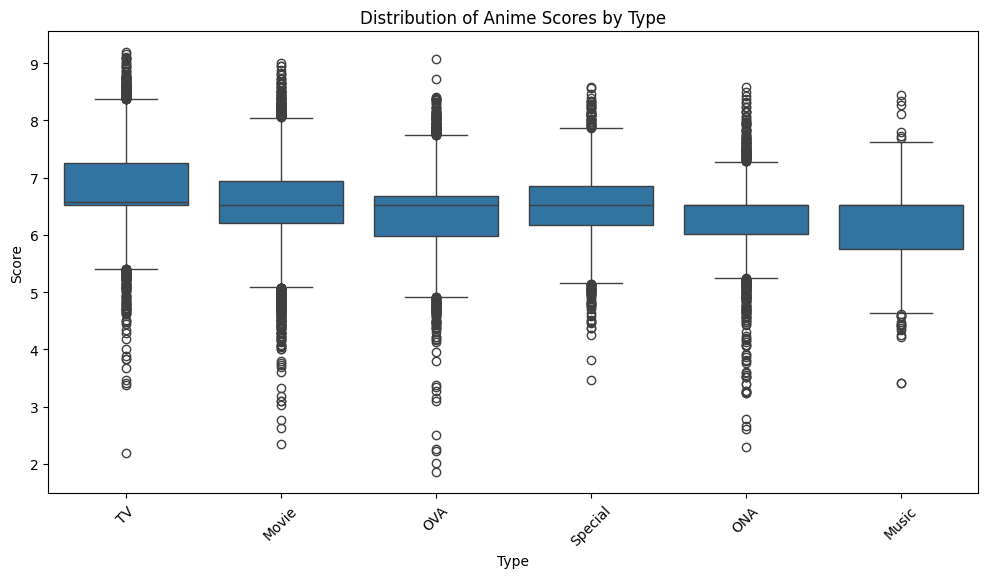

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type', y='Score')
plt.title('Distribution of Anime Scores by Type')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Score')
plt.show()

## Genre Analysis:

Explore the most common genres in the dataset and analyze their distribution.

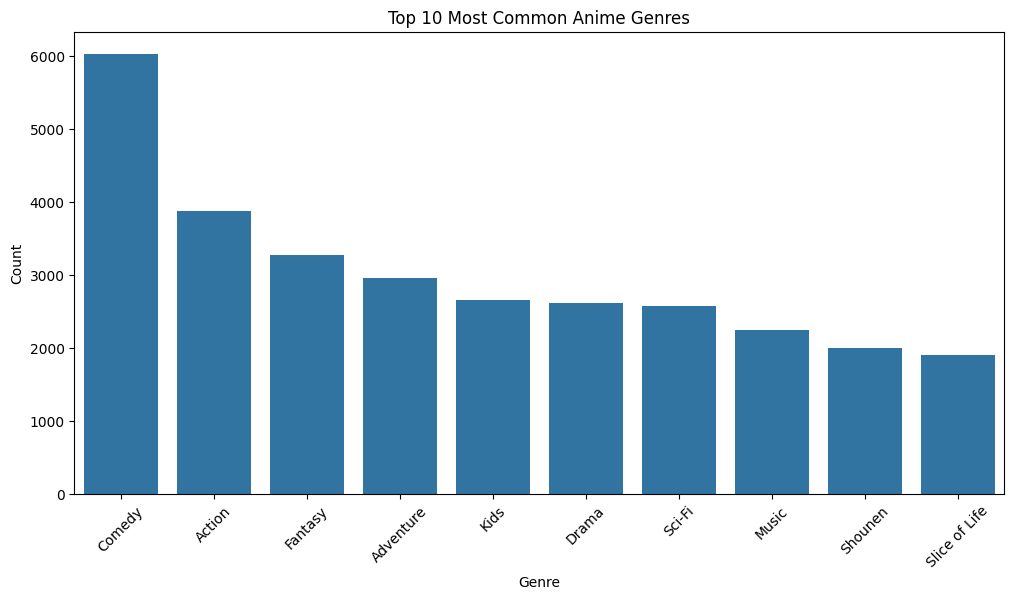

In [18]:
# Count the occurrence of each genre
genres_counts = df['Genres'].str.split(', ').explode().value_counts()

# Plot the top 10 most common genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_counts.head(10).index, y=genres_counts.head(10).values)
plt.title('Top 10 Most Common Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Duration Analysis:

Explore the distribution of anime episode durations.

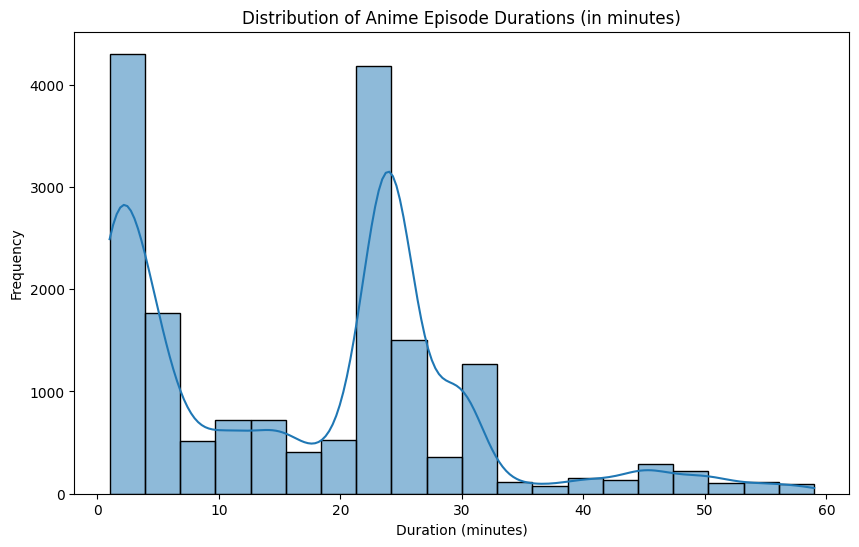

In [19]:
# Extract numeric duration values
df['Duration Minutes'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Plot the distribution of episode durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration Minutes'], bins=20, kde=True)
plt.title('Distribution of Anime Episode Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

## Rating Analysis:

Analyze the distribution of anime ratings by age rating.

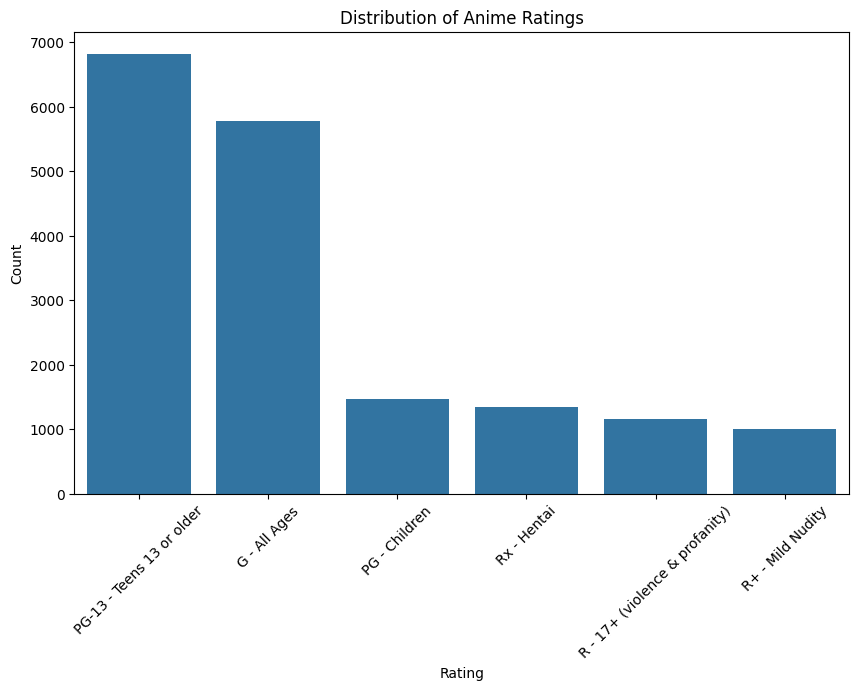

In [20]:
# Count the occurrence of each rating
rating_counts = df['Rating'].value_counts()

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Relationship Between Scores and Popularity:

Explore the relationship between anime scores and their popularity.

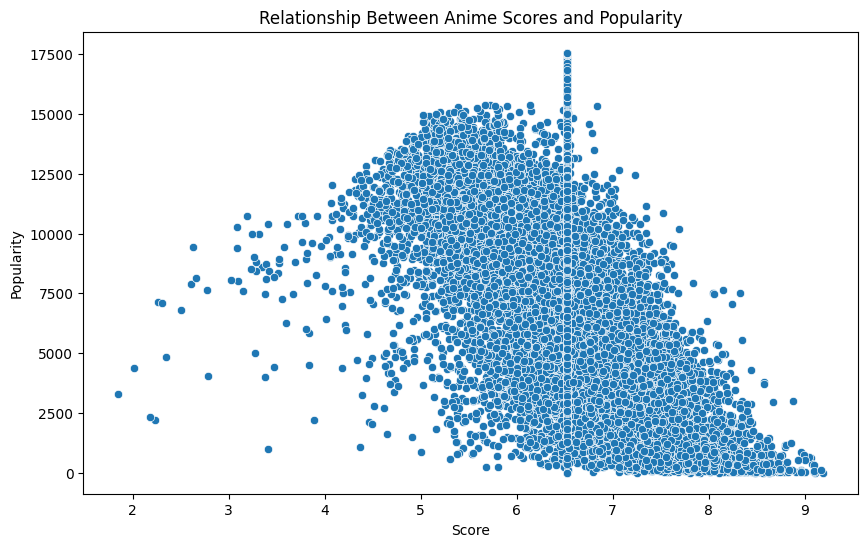

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Score', y='Popularity')
plt.title('Relationship Between Anime Scores and Popularity')
plt.xlabel('Score')
plt.ylabel('Popularity')
plt.show()

# Correlation Analysis
Create a correlation heatmap to identify relationships between numerical features.

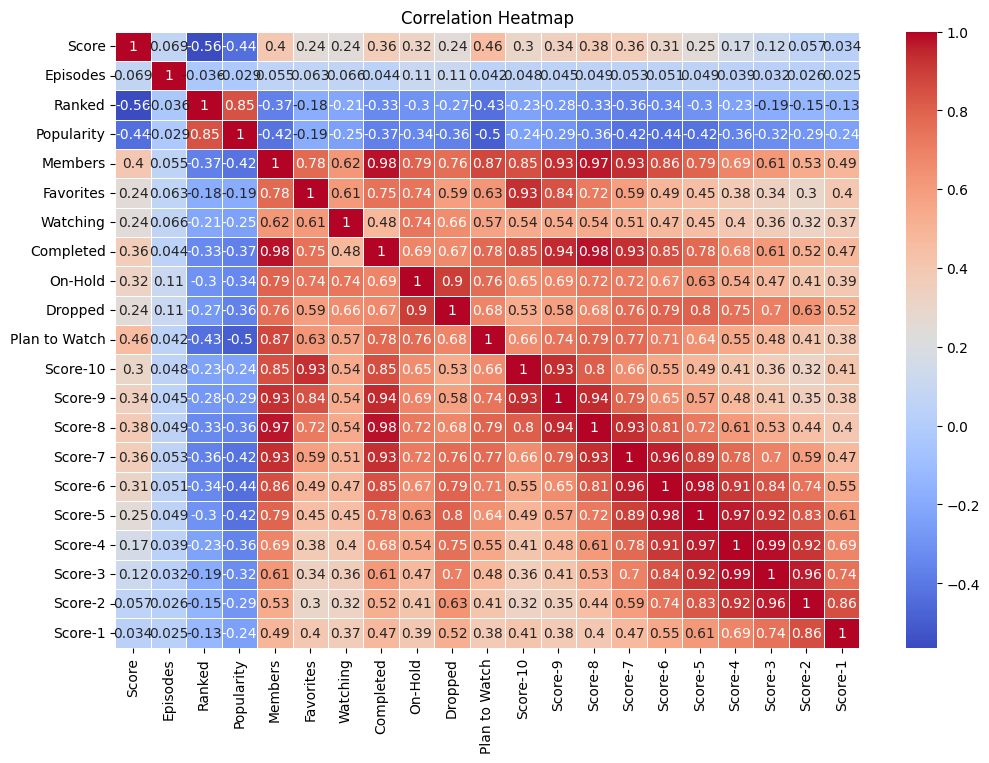

In [22]:
# Correlation heatmap
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#  Questions for Analysis

## Genre Analysis:

###  What is the distribution of anime types (TV, Movie, OVA, etc.)?
To analyze the distribution of anime types in your dataset, we can create a bar chart.

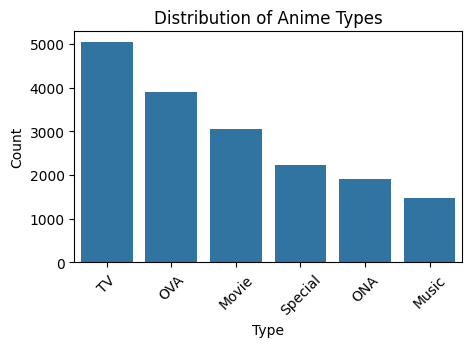

In [23]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Which genre has the most anime titles?
To find out which genre has the most anime titles in your dataset, we can create a bar chart showing the distribution of anime genres.

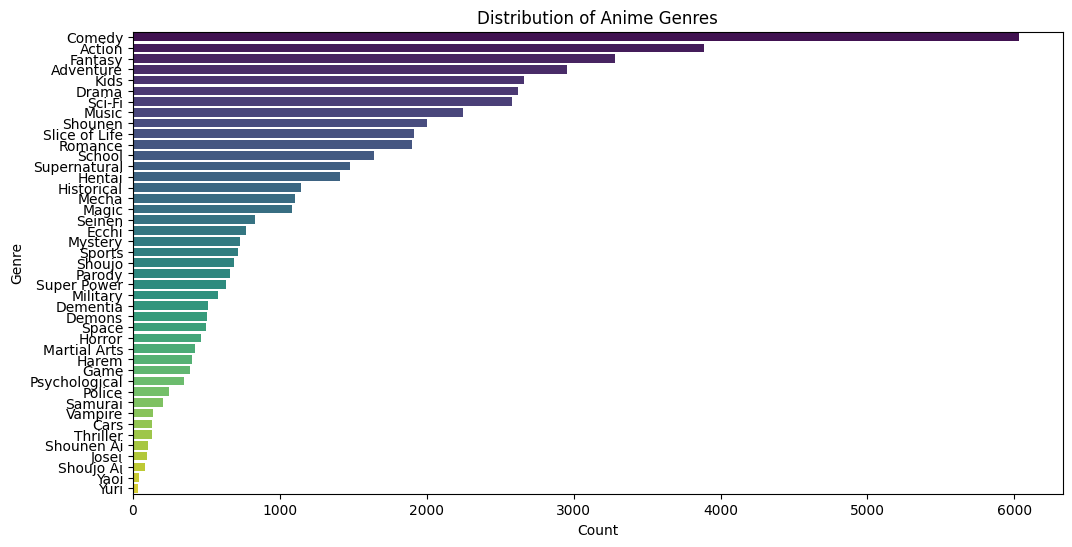

In [24]:
# Split the 'Genres' column by comma and stack the genres
genre_counts = df['Genres'].str.split(', ').explode().value_counts()

# Create a bar chart for the genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribution of Anime Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

### Which genre has the highest average rating?
To find out which genre has the highest average rating in your dataset, we can calculate the average rating for each genre and then identify the genre with the highest average rating. 

In [25]:
# Split the 'Genres' column by comma and stack the genres
genre_ratings = df[['Genres', 'Score']]
genre_ratings['Genres'] = genre_ratings['Genres'].str.split(', ')
genre_ratings = genre_ratings.explode('Genres')

# Calculate the average rating for each genre
genre_avg_rating = genre_ratings.groupby('Genres')['Score'].mean()

# Find the genre with the highest average rating
highest_avg_rating_genre = genre_avg_rating.idxmax()
highest_avg_rating = genre_avg_rating.max()

print(f"The genre with the highest average rating is '{highest_avg_rating_genre}' with an average rating of {highest_avg_rating:.2f}")

The genre with the highest average rating is 'Thriller' with an average rating of 7.05


###  Which genre is the most popular among viewers (highest total members)?
To find out which genre is the most popular among viewers based on the highest total number of members, we can calculate the total members for each genre and then identify the genre with the highest total members.

In [26]:
# Split the 'Genres' column by comma and stack the genres
genre_members = df[['Genres', 'Members']]
genre_members['Genres'] = genre_members['Genres'].str.split(', ')
genre_members = genre_members.explode('Genres')

# Calculate the total members for each genre
genre_total_members = genre_members.groupby('Genres')['Members'].sum()

# Find the genre with the highest total members
most_popular_genre = genre_total_members.idxmax()
highest_total_members = genre_total_members.max()

print(f"The most popular genre among viewers is '{most_popular_genre}' with a total of {highest_total_members} members.")

The most popular genre among viewers is 'Comedy' with a total of 284687458 members.


### Can you find any interesting patterns or trends in genre combinations?


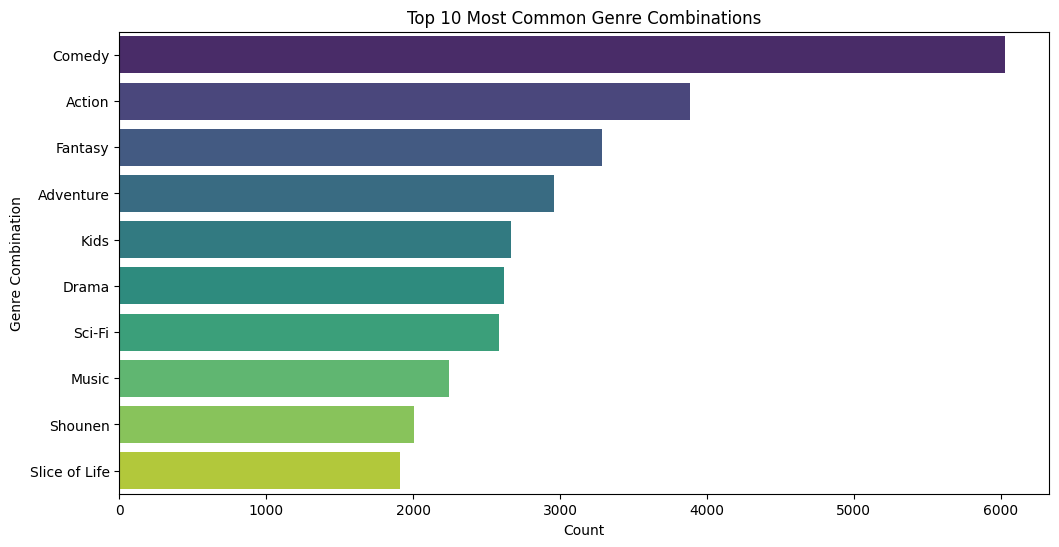

In [27]:
# Split the 'Genres' column by comma and stack the genres
genre_combinations = df['Genres'].str.split(', ').explode()

# Calculate the count of each genre combination
genre_combination_counts = genre_combinations.value_counts()

# Plot the top N most common genre combinations (adjust N as needed)
top_n = 10
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_combination_counts.head(top_n).values, y=genre_combination_counts.head(top_n).index, palette='viridis')
plt.title(f'Top {top_n} Most Common Genre Combinations')
plt.xlabel('Count')
plt.ylabel('Genre Combination')
plt.show()

## Type Analysis:

###  What is the average rating for each anime type (TV, Movie, OVA, etc.)?
To calculate the average rating for each anime type (TV, Movie, OVA, etc.) in your dataset, we can group the data by the 'Type' column and then compute the mean rating within each group

In [28]:
# Group the data by 'Type' and calculate the average rating for each group
average_rating_by_type = df.groupby('Type')['Score'].mean()

# Display the average rating for each anime type
average_rating_by_type

Type
Movie      6.505166
Music      6.203261
ONA        6.299874
OVA        6.367054
Special    6.504585
TV         6.805261
Name: Score, dtype: float64

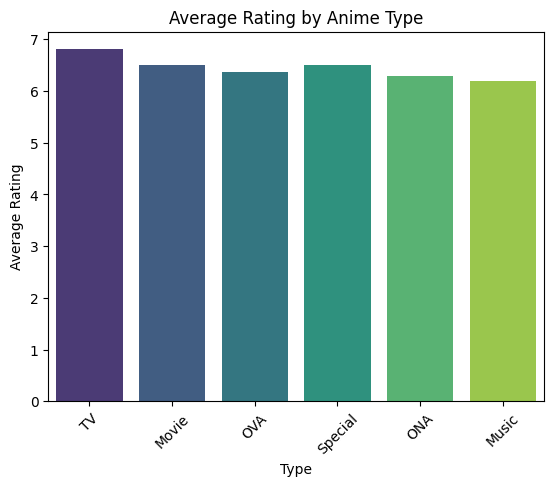

In [29]:
# Create a bar chart for the average rating by anime type
sns.barplot(data=df, x='Type', y='Score', palette='viridis', ci=None)
plt.title('Average Rating by Anime Type')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

###  Do certain types tend to have more episodes on average?
To determine whether certain anime types tend to have more episodes on average, we can calculate the average number of episodes for each anime type and then visualize the results. 

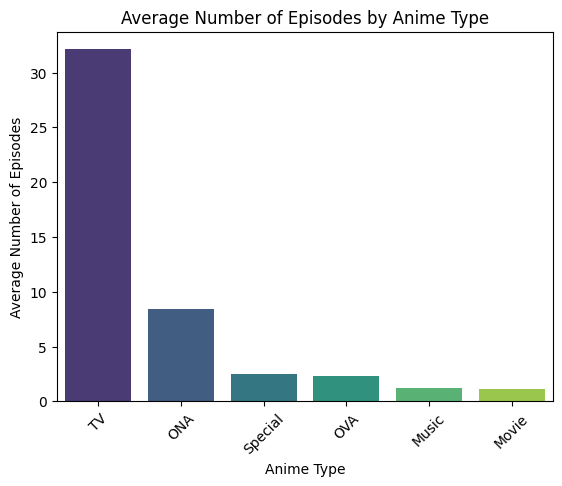

In [30]:
# Group the data by anime type and calculate the average number of episodes
average_episodes_by_type = df.groupby('Type')['Episodes'].mean().sort_values(ascending=False)

# Create a bar chart to visualize the average number of episodes by anime type
sns.barplot(x=average_episodes_by_type.index, y=average_episodes_by_type.values, palette='viridis')
plt.title('Average Number of Episodes by Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Average Number of Episodes')
plt.xticks(rotation=45)
plt.show()

### Are there any notable differences in the popularity (members) of different types of anime?
To identify any notable differences in the popularity (number of members) of different types of anime, you can calculate summary statistics and create visualizations to compare the popularity of anime types.

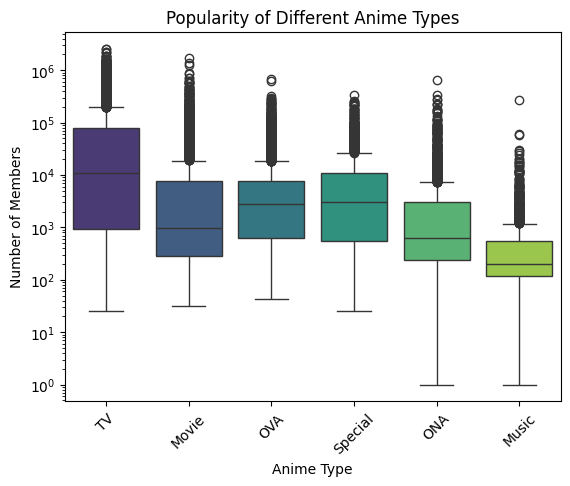

In [31]:
# Create a box plot to compare the popularity (number of members) of different types of anime
sns.boxplot(data=df, x='Type', y='Members', palette='viridis')
plt.title('Popularity of Different Anime Types')
plt.xlabel('Anime Type')
plt.ylabel('Number of Members')
plt.xticks(rotation=45)
plt.yscale('log')  # Use a log scale for the y-axis for better visualization
plt.show()

## Rating and Popularity:

###  Is there a correlation between the number of members and the rating of anime?
To determine if there is a correlation between the number of members and the rating of anime, you can calculate the correlation coefficient and create a scatter plot to visualize the relationship.

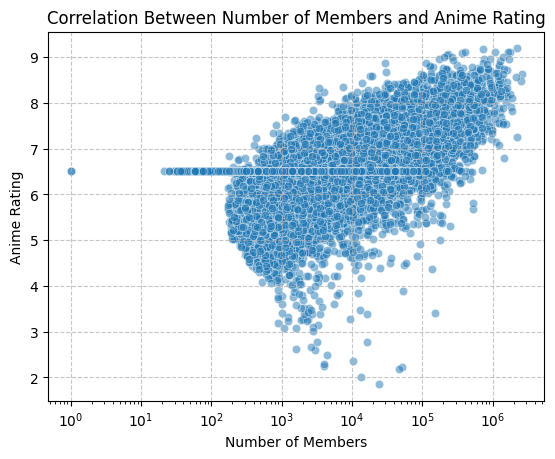

In [32]:
# Create a scatter plot to visualize the correlation between 'Members' and 'Score'
sns.scatterplot(data=df, x='Members', y='Score', alpha=0.5)
plt.title('Correlation Between Number of Members and Anime Rating')
plt.xlabel('Number of Members')
plt.ylabel('Anime Rating')
plt.xscale('log')  # Use a log scale for the x-axis for better visualization
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [33]:
# Calculate the correlation coefficient
correlation_coefficient = df['Members'].corr(df['Score'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

Correlation Coefficient: 0.40


### Identify the top 10 highest-rated anime series with a significant number of members.
To identify the top 10 highest-rated anime series with a significant number of members, we can filter the dataset to include only those with a significant number of members and then sort them by rating.

In [34]:
# Define a threshold for a significant number of members (adjust as needed)
significant_members_threshold = 100000  # For example, consider anime with over 100,000 members significant

# Filter the dataset for anime with a significant number of members
significant_anime = df[df['Members'] >= significant_members_threshold]

# Sort the filtered dataset by rating in descending order and select the top 10
top_rated_anime = significant_anime.sort_values(by='Score', ascending=False).head(10)

# Display the top 10 highest-rated anime with a significant number of members
print(top_rated_anime[['Name', 'Score', 'Members']])

                                       Name  Score  Members
3971       Fullmetal Alchemist: Brotherhood   9.19  2248456
15926  Shingeki no Kyojin: The Final Season   9.17   733260
5683                            Steins;Gate   9.11  1771162
14963    Shingeki no Kyojin Season 3 Part 2   9.10  1073626
9913                               Gintama°   9.10   404121
6474                 Hunter x Hunter (2011)   9.10  1673924
6006                               Gintama'   9.08   365579
741                    Ginga Eiyuu Densetsu   9.07   230168
7261                    Gintama': Enchousen   9.04   222819
9886                         Koe no Katachi   9.00  1387607


### Are there any anime with a high rating but a surprisingly low number of members?
To identify anime with a high rating but a surprisingly low number of members, we can set criteria for what you consider a high rating and a low number of members and then filter the dataset accordingly.

In [35]:
# Define thresholds for high rating and low number of members (adjust as needed)
high_rating_threshold = 7.5  # For example, consider ratings above 8.5 as high
low_members_threshold = 1000  # For example, consider members below 1000 as low

# Filter the dataset for anime that meet the criteria
high_rating_low_members_anime = df[(df['Score'] >= high_rating_threshold) & (df['Members'] <= low_members_threshold)]

# Display the anime with high ratings but low members
print(high_rating_low_members_anime[['Name', 'Score', 'Members']])

            Name  Score  Members
17505  Heikousen   7.52      832


## Episode Analysis:

### What is the average episode count for each type of anime?
To find the average episode count for each type of anime, we can group the dataset by anime type and calculate the mean (average) episode count for each group.

In [36]:
# Group the data by anime type and calculate the average episode count
average_episode_count_by_type = df.groupby('Type')['Episodes'].mean()

# Display the average episode count for each type of anime
print(average_episode_count_by_type)

Type
Movie       1.121999
Music       1.180395
ONA         8.401154
OVA         2.351053
Special     2.480613
TV         32.122392
Name: Episodes, dtype: float64


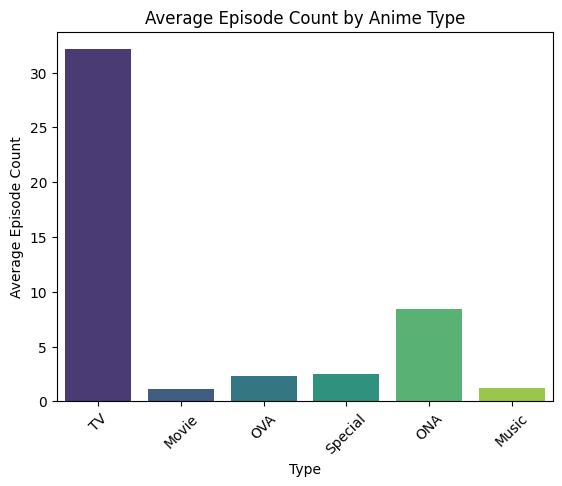

In [37]:
# Create a bar chart for the average episode count by anime type
sns.barplot(data=df, x='Type', y='Episodes', palette='viridis', ci=None)
plt.title('Average Episode Count by Anime Type')
plt.xlabel('Type')
plt.ylabel('Average Episode Count')
plt.xticks(rotation=45)
plt.show()

### Explore the distribution of episode counts for anime with high ratings.
To explore the distribution of episode counts for anime with high ratings, we can create a histogram. 

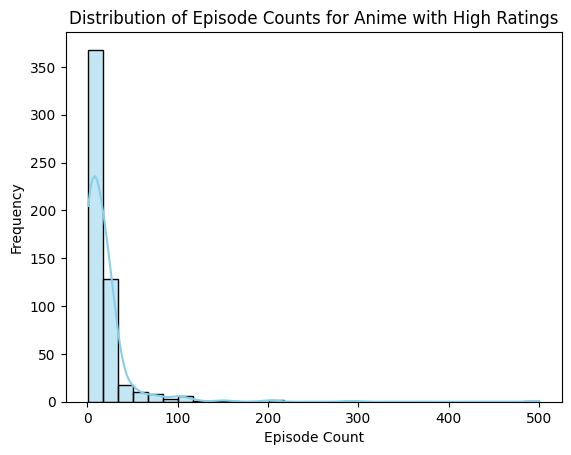

In [38]:
# Define a threshold for high ratings (adjust as needed)
high_rating_threshold = 8.0  # For example, consider ratings above 8.0 as high

# Filter the dataset for anime with high ratings
high_rating_anime = df[df['Score'] >= high_rating_threshold]

# Create a histogram to explore the distribution of episode counts
sns.histplot(data=high_rating_anime, x='Episodes', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Episode Counts for Anime with High Ratings')
plt.xlabel('Episode Count')
plt.ylabel('Frequency')
plt.show()

##  User Engagement:

### What is the average number of user reviews or discussions for highly rated anime?
To find the average number of user reviews or discussions for highly rated anime, we can calculate this by first filtering the dataset for highly rated anime and then calculating the average number of user reviews or discussions.

In [39]:
# Define a threshold for high ratings (adjust as needed)
high_rating_threshold = 8.0  # For example, consider ratings above 8.0 as high

# Filter the dataset for highly rated anime
highly_rated_anime = df[df['Score'] >= high_rating_threshold]

# Calculate the average number of user reviews or discussions (Members) for highly rated anime
average_user_reviews = highly_rated_anime['Members'].mean()

print(f"The average number of user reviews or discussions for highly rated anime is approximately {average_user_reviews:.2f}")

The average number of user reviews or discussions for highly rated anime is approximately 365344.06


## Recommendation System:

### Recommend the top 5 anime titles to a user based on their favourite genre and rating preferences?

In [40]:
# Convert 'Genres' column to a binary indicator variable for each genre
genres = df['Genres'].str.get_dummies(', ')

# User input: Preferred genres and rating threshold
user_preferred_genres = list(map(str, input("Enter the genres in comma separated values:").replace(', ', ',').split(',')))
rating_threshold = float(input('Enter the rating threshold: '))

# Filter the dataset based on user preferences
filtered_anime = df[(df['Score'] >= rating_threshold) & (genres[user_preferred_genres].sum(axis=1) > 0)]

# Sort the filtered dataset by 'Score' in descending order
sorted_anime = filtered_anime.sort_values(by='Score', ascending=False)

# Recommend the top-rated anime titles to the user
recommendations = sorted_anime[['Name', 'Score']].head(5)

print("Recommended Anime Titles:")
print(recommendations)

Enter the genres in comma separated values:Action
Enter the rating threshold: 8
Recommended Anime Titles:
                                       Name  Score
3971       Fullmetal Alchemist: Brotherhood   9.19
15926  Shingeki no Kyojin: The Final Season   9.17
6474                 Hunter x Hunter (2011)   9.10
14963    Shingeki no Kyojin Season 3 Part 2   9.10
9913                               Gintama°   9.10


## Genre Combinations:

### Identify the most common genre combinations.

In [41]:
# Split the 'Genres' column into individual genre labels
genre_lists = df['Genres'].str.split(', ')

# Create a list to store all genre combinations
genre_combinations = []

# Iterate through each row and append the genre combinations to the list
for genres in genre_lists:
    genre_combinations.extend(genres)

# Create a pandas Series to count the occurrences of each genre
genre_counts = pd.Series(genre_combinations).value_counts()

# Display the top 10 most common genre combinations
top_10_genres = genre_counts.head(10)
print("Top 10 Most Common Genre Combinations:")
print(top_10_genres)

Top 10 Most Common Genre Combinations:
Comedy           6029
Action           3888
Fantasy          3285
Adventure        2957
Kids             2665
Drama            2619
Sci-Fi           2583
Music            2244
Shounen          2003
Slice of Life    1914
Name: count, dtype: int64


### Analyse the average rating and popularity of anime with specific genre combinations.
To analyze the average rating and popularity of anime with specific genre combinations, we can filter the dataset based on the desired genre combinations and then calculate the average rating and popularity for those anime titles

In [42]:
# Define the specific genre combinations you want to analyze
specific_genre_combinations = ['Action, Adventure', 'Drama, Romance', 'Comedy, Slice of Life']

# Create a list to store dictionaries with results
results = []

# Iterate through the specific genre combinations
for genre_combination in specific_genre_combinations:
    # Split the genre combination into individual genres
    genres = genre_combination.split(', ')
    
    # Filter the dataset based on the specific genre combination
    filtered_anime = df[df['Genres'].str.contains(genres[0]) & df['Genres'].str.contains(genres[1])]
    
    # Calculate the average rating and popularity for the filtered anime
    average_rating = filtered_anime['Score'].mean()
    average_popularity = filtered_anime['Popularity'].mean()
    
    # Append the results as a dictionary
    results.append({'Genre Combination': genre_combination,
                    'Average Rating': average_rating,
                    'Average Popularity': average_popularity})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

       Genre Combination  Average Rating  Average Popularity
0      Action, Adventure        6.786879         6388.452229
1         Drama, Romance        6.975804         4435.548246
2  Comedy, Slice of Life        6.824594         6762.655706


## Content-Length vs. Rating:

### Is there a correlation between the length of anime content (e.g., movie vs. TV series) and its rating?

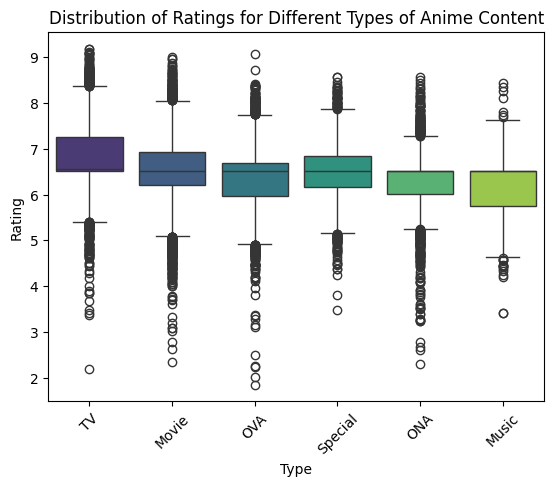

In [43]:
# Create a box plot to visualize the distribution of ratings for each type of anime content
sns.boxplot(data=df, x='Type', y='Score', palette='viridis')
plt.title('Distribution of Ratings for Different Types of Anime Content')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

## Time Analysis:

### How has the number of anime produced per year changed over time?
To analyze how the number of anime produced per year has changed over time, you can use Python and pandas to group the data by year and count the number of anime produced in each year.

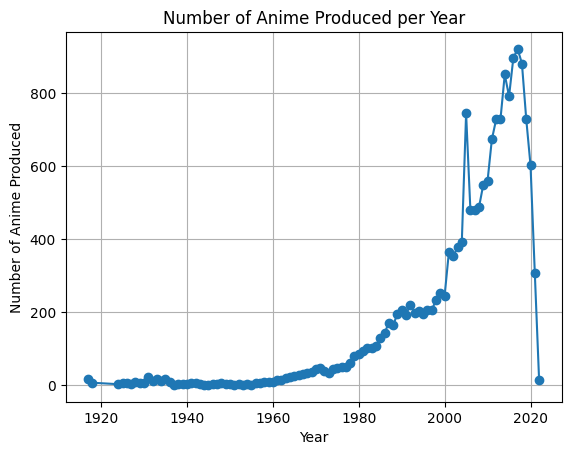

In [44]:
# Extract the 'Aired' column to get the broadcast year
df['Year'] = df['Aired'].str.extract(r'(\d{4})')[0]

# Group the data by year and count the number of anime produced each year
anime_per_year = df.groupby('Year')['MAL_ID'].count().reset_index()

# Filter out rows with missing year values
anime_per_year = anime_per_year[anime_per_year['Year'].notna()]

# Convert the 'Year' column to numeric
anime_per_year['Year'] = pd.to_numeric(anime_per_year['Year'])

# Create a line plot to visualize the change in the number of anime produced per year
plt.plot(anime_per_year['Year'], anime_per_year['MAL_ID'], marker='o', linestyle='-')
plt.title('Number of Anime Produced per Year')
plt.xlabel('Year')
plt.ylabel('Number of Anime Produced')
plt.grid(True)
plt.show()

###  Is there a trend in the duration of anime episodes or movies over the years?
To analyze whether there is a trend in the duration of anime episodes or movies over the years, you can use Python and pandas to group the data by year and calculate the average duration of episodes or movies for each year.

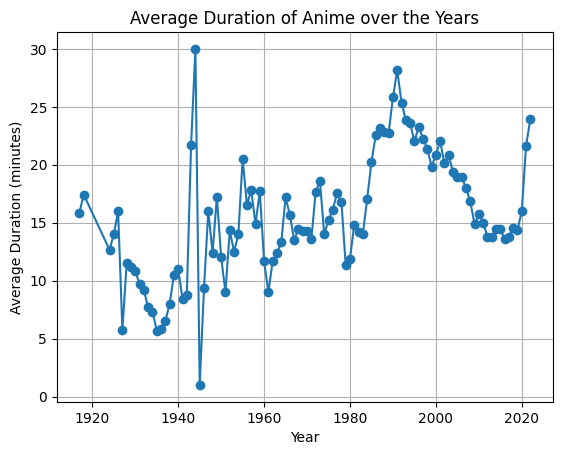

In [45]:
# Extract the 'Aired' column to get the broadcast year
df['Year'] = df['Aired'].str.extract(r'(\d{4})')[0]

# Filter out rows with missing year values
df = df[df['Year'].notna()]

# Convert the 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'])

# Create a function to extract the duration in minutes from the 'Duration' column
def extract_duration(duration_str):
    try:
        minutes = int(duration_str.split(' ')[0])
        return minutes
    except:
        return None

# Apply the extract_duration function to create a new 'Duration (min)' column
df['Duration (min)'] = df['Duration'].apply(extract_duration)

# Group the data by year and calculate the average duration for each year
average_duration_per_year = df.groupby('Year')['Duration (min)'].mean().reset_index()

# Create a line plot to visualize the change in the average duration over the years
plt.plot(average_duration_per_year['Year'], average_duration_per_year['Duration (min)'], marker='o', linestyle='-')
plt.title('Average Duration of Anime over the Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()